# Visualization

In [3]:
from pycocotools.coco import COCO
import layoutparser as lp
import random
import cv2

In [4]:
def load_coco_annotations(annotations, coco=None):
    """
    Args:
        annotations (List):
            a list of coco annotaions for the current image
        coco (`optional`, defaults to `False`):
            COCO annotation object instance. If set, this function will
            convert the loaded annotation category ids to category names
            set in COCO.categories
    """
    layout = lp.Layout()

    for ele in annotations:

        x, y, w, h = ele['bbox']

        layout.append(
            lp.TextBlock(
                block = lp.Rectangle(x, y, w+x, h+y),
                type  = ele['category_id'] if coco is None else coco.cats[ele['category_id']]['name'],
                id = ele['id']
            )
        )

    return layout

In [5]:
COCO_ANNO_PATH = 'output_json/data2.json'
COCO_IMG_PATH  = 'images'

coco = COCO(COCO_ANNO_PATH)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


POTER_HOME-POTER_HOME_ENTRANCE-1667338879.avi-frame16.jpg


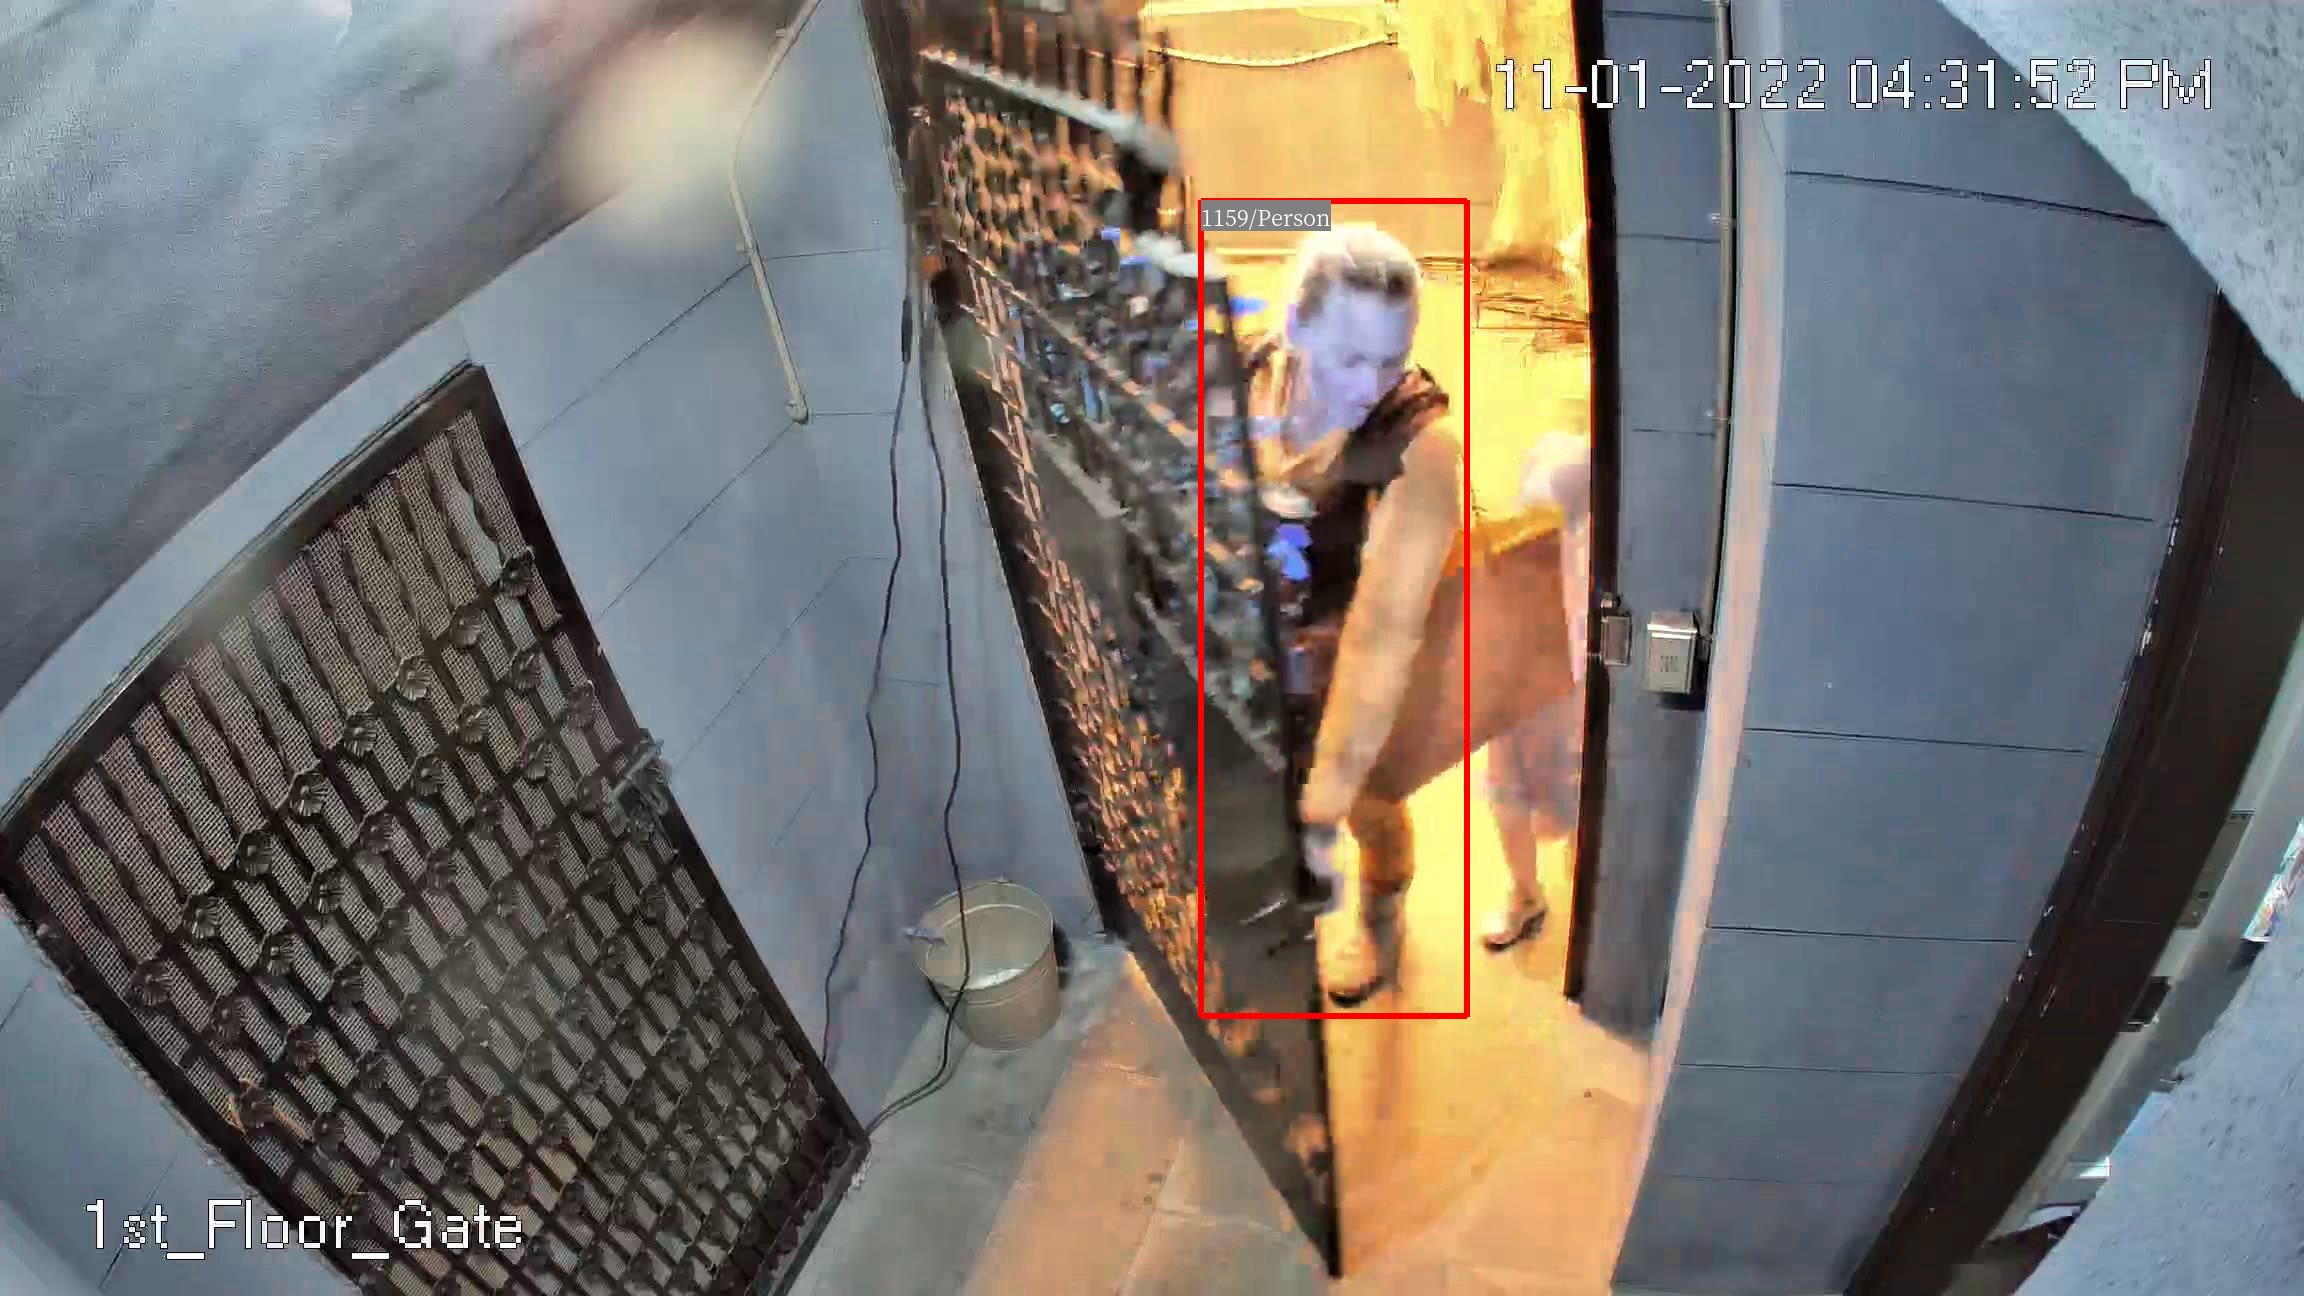

frame_1415.jpg


AttributeError: 'NoneType' object has no attribute 'load'

In [8]:

color_map = {
    'text':   'red',
    'title':  'blue',
    'list':   'green',
    'table':  'purple',
    'figure': 'pink',
}

for i in range(5):
    for image_id in random.sample(coco.imgs.keys(), 1):
        image_info = coco.imgs[image_id]
        annotations = coco.loadAnns(coco.getAnnIds([image_id]))

        image = cv2.imread(f'{COCO_IMG_PATH}/{image_info["file_name"]}')
        print(image_info["file_name"])
        layout = load_coco_annotations(annotations, coco)

        # viz = lp.draw_box(image, layout, color_map=color_map)
        
        
        viz = lp.draw_box(image,
                [b.set(id=f'{b.id}/{b.type}') for b in layout],
                color_map=color_map,
                show_element_id=True, id_font_size=22,
                id_text_background_color='grey',
                id_text_color='white')

        display(viz) # show the results

In [33]:
for id,i in enumerate(classes):
    if labels == i:
        category_id = id
        print(labels, category_id)
        

Dog 2
